# Machine Learning Project, Student number- 210530926 


## Regression
This dataset consists of data about the flights of different Indian companies. The task is to predict the price of the flight based on the 11 features.

https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction/code

In [439]:

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
import xgboost as xgb

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import OPTICS
from sklearn.metrics import make_scorer
from sklearn.manifold import TSNE

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [329]:
df = pd.read_csv('Clean_dataset.csv')

In [330]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [331]:
y = df['price']
df.drop('price',axis=1,inplace=True)

x=df
x.drop('Unnamed: 0',axis=1,inplace=True)
x.drop('flight',axis=1,inplace=True)
x = pd.get_dummies(x)

In [332]:
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

In [333]:
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [334]:
len(x.columns)

37

In [335]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=228)


In [336]:
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
    'max_iter': [1000, 5000, 10000]
}


grid_search = GridSearchCV(ElasticNet(), param_grid, cv=5, n_jobs=-1, scoring='r2')

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0, 5.0],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
                         'max_iter': [1000, 5000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

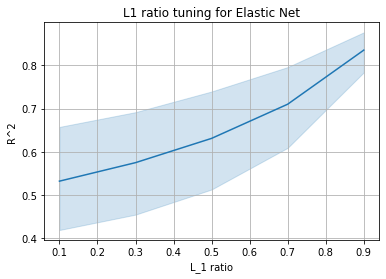

In [337]:
mean_test_scores = grid_search.cv_results_['mean_test_score']
hyperparams = grid_search.cv_results_['params']
alpha = [x['alpha'] for x in hyperparams]
l1_rat = [x['l1_ratio'] for x in hyperparams]
max_it = [x['max_iter'] for x in hyperparams]

sns.lineplot(x=l1_rat,y=mean_test_scores)
plt.xlabel('L_1 ratio')
plt.ylabel('R^2')
plt.title('L1 ratio tuning for Elastic Net')
plt.grid(True)
plt.show()

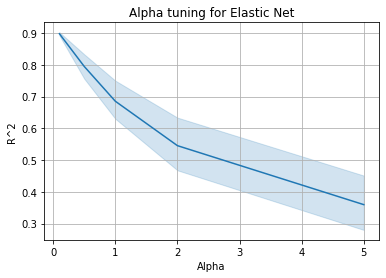

In [338]:
mean_test_scores = grid_search.cv_results_['mean_test_score']
hyperparams = grid_search.cv_results_['params']
alpha = [x['alpha'] for x in hyperparams]
l1_rat = [x['l1_ratio'] for x in hyperparams]
max_it = [x['max_iter'] for x in hyperparams]

sns.lineplot(x=alpha,y=mean_test_scores)
plt.xlabel('Alpha')
plt.ylabel('R^2')
plt.title('Alpha tuning for Elastic Net')
plt.grid(True)
plt.show()

In [339]:
y_pred = grid_search.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

In [340]:
metric = pd.DataFrame()
metric['Model'] = ['ElasticNet']
metric['R^2'] = r2
metric['MSE'] = mse
metric['MAPE'] = mape(y_test,y_pred)

In [341]:
metric

,Model,R^2,MSE,MAPE
0,ElasticNet,0.911353,4.578387e+07,45.2412


In [369]:
param_grid = {
    'max_depth': [None, 5, 10,15, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}
grid_search_tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_tree.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_sampl

In [343]:
y_pred = grid_search.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

In [344]:
metric = metric.append({'Model':'DecisionTreeRegressor','R^2':r2,'MSE':mse,'MAPE':mape(y_test,y_pred)},ignore_index=True)

In [370]:
param_grid = {
    'max_depth': [None, 5, 10,15,20],
    'max_features': ['sqrt', 'log2']
}
grid_search_forest = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

grid_search_forest.fit(X_train,y_train)

/Users/michaelmiller/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [347]:
y_pred = grid_search.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
metric = metric.append({'Model':'RandomForestRegressor','R^2':r2,'MSE':mse,'MAPE':mape(y_test,y_pred)},ignore_index=True)

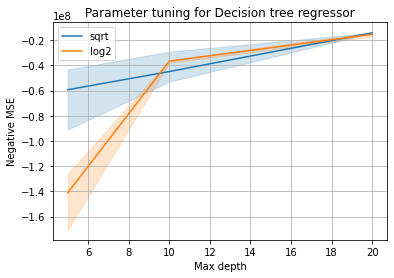

In [380]:
mean_test_scores_tree = grid_search_tree.cv_results_['mean_test_score']
mean_test_scores_forest = grid_search_forest.cv_results_['mean_test_score']
hyperparams_tree = grid_search_tree.cv_results_['params']
hyperparams_forest = grid_search_forest.cv_results_['params']
max_depth_tree = [x['max_depth'] for x in hyperparams_tree]
max_depth_forest = [x['max_depth'] for x in hyperparams_forest]
max_feat_tree = [x['max_features'] for x in hyperparams_tree]
max_feat_forest = [x['max_features'] for x in hyperparams_forest]
sns.lineplot(x=max_depth_tree,y=mean_test_scores_tree,hue=max_feat_tree)

plt.xlabel('Max depth')
plt.ylabel('Negative MSE')
plt.title('Parameter tuning for Decision tree regressor')
plt.grid(True)
plt.show()

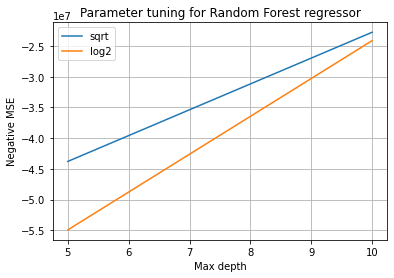

In [384]:
sns.lineplot(x=max_depth_forest,y=mean_test_scores_forest,hue=max_feat_forest,ci=0.99)

plt.xlabel('Max depth')
plt.ylabel('Negative MSE')
plt.title('Parameter tuning for Random Forest regressor')
plt.grid(True)
plt.show()

In [349]:

xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')

   
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:squarederror', predictor=None, ...)

In [353]:
y_pred = xgb_reg.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
metric = metric.append({'Model':'XGBRegressor','R^2':r2,'MSE':mse,'MAPE':mape(y_test,y_pred)},ignore_index=True)

In [362]:
metric.drop(3,axis=0,inplace=True)

In [366]:

metric.drop('level_0',axis=1,inplace=True)
metric

,Model,R^2,MSE,MAPE
0,ElasticNet,0.911353,4.578387e+07,45.241200
1,DecisionTreeRegressor,0.981894,9.351097e+06,7.597410
2,RandomForestRegressor,0.984400,8.056752e+06,7.391853
3,XGBRegressor,0.978283,1.121611e+07,14.304427


# Classification
The dataset consists of 12 features related to the heart attack. The goal is to predict whether the person
will have a heart attack based on the predictors

https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?select=heart.csv

In [401]:
df_class = pd.read_csv('heart.csv-3.xls')

In [402]:
df_class = df_class.dropna()
y = df_class['output']
df_class.drop('output',axis=1,inplace=True)

<AxesSubplot:>

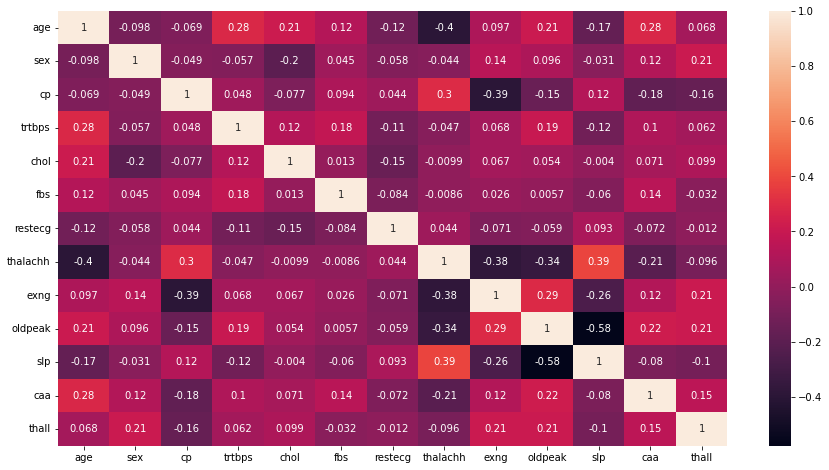

In [403]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_class.corr(), annot=True)

<AxesSubplot:>

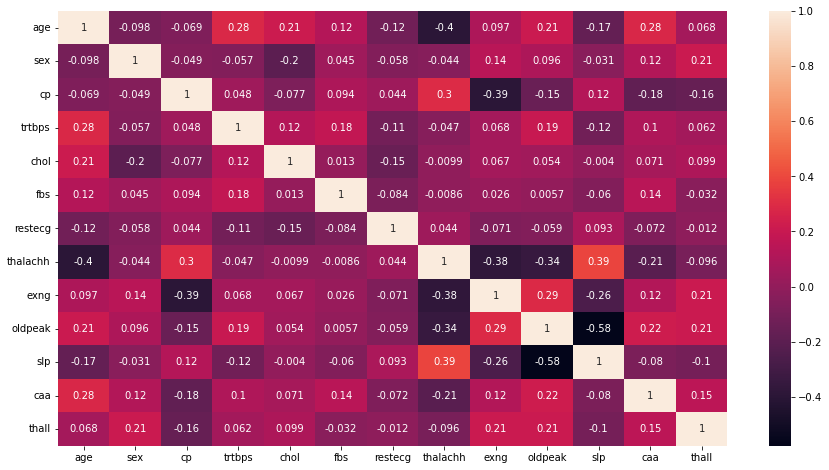

In [404]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_class.corr(), annot=True)


<AxesSubplot:xlabel='output', ylabel='Count'>

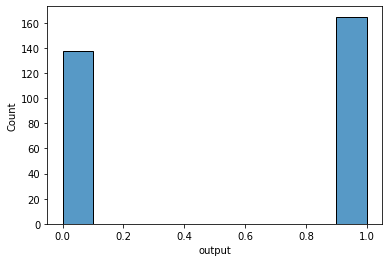

In [405]:
sns.histplot(y)

In [406]:
x = pd.get_dummies(df_class).dropna()

In [407]:
y.mean()

0.5445544554455446

In [441]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
param_grid = {
    "penalty": ["l1", "l2"],
    "C": [0.001, 0.01, 0.1, 1, 3]
}

model = LogisticRegression(solver='saga',max_iter=10000)
grid_search = GridSearchCV(model, param_grid, cv=5,scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 3],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

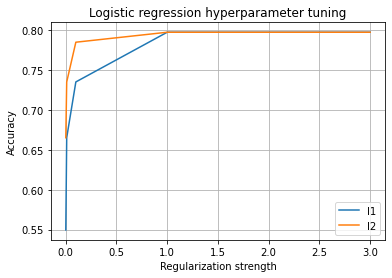

In [442]:
hyperparams = grid_search.cv_results_['params']
mean_test_scores = grid_search.cv_results_['mean_test_score']

power = [x['C'] for x in hyperparams]
pen = [x['penalty'] for x in hyperparams]
sns.lineplot(x=power,y=mean_test_scores,hue=pen)

plt.xlabel('Regularization strength')
plt.ylabel('Accuracy')
plt.title('Logistic regression hyperparameter tuning')
plt.grid(True)
plt.show()

In [82]:
grid_search.best_score_

0.8058673469387756

In [443]:
y_pred = grid_search.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
f_1 = metrics.f1_score(y_test, y_pred)

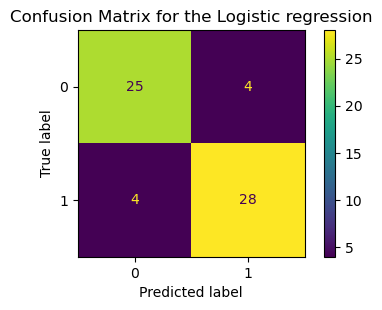

In [450]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,3), dpi=100)
matr = ConfusionMatrixDisplay(cm, display_labels=grid_search.classes_)
ax.set(title='Confusion Matrix for the Logistic regression')
matr.plot(ax=ax)

In [100]:
metric_class = pd.DataFrame()
metric_class['Model'] = ['LogisticRegression']
metric_class['Accuracy'] = accuracy
metric_class['F1 score'] = f_1

In [102]:
metric_class

,Model,Accuracy,F1 score
0,LogisticRegression,0.868852,0.875


In [451]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
}

# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

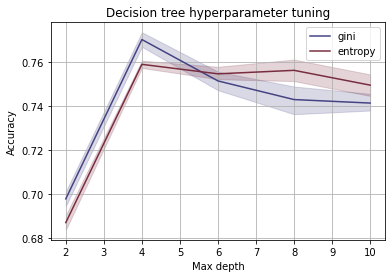

In [433]:
hyperparams = grid_search.cv_results_['params']
mean_test_scores = grid_search.cv_results_['mean_test_score']

dep = [x['max_depth'] for x in hyperparams]
criterion = [x['criterion'] for x in hyperparams]

sns.lineplot(x=dep,y=mean_test_scores,hue=criterion,palette='icefire')

plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.title('Decision tree hyperparameter tuning')
plt.grid(True)
plt.show()

In [452]:
y_pred = grid_search.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
f_1 = metrics.f1_score(y_test, y_pred)

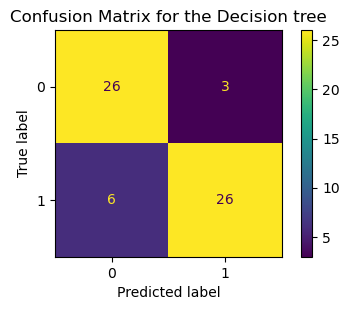

In [454]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = pltx.subplots(figsize=(5,3), dpi=100)
matr = ConfusionMatrixDisplay(cm, display_labels=grid_search.classes_)
ax.set(title='Confusion Matrix for the Decision tree')
matr.plot(ax=ax)

In [112]:
accuracy

0.819672131147541

In [108]:
metric_class = metric_class.append({'Model':'DecisionTreeClassifier','Accuracy':accuracy,'F1 score':f_1},ignore_index=True)

In [455]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

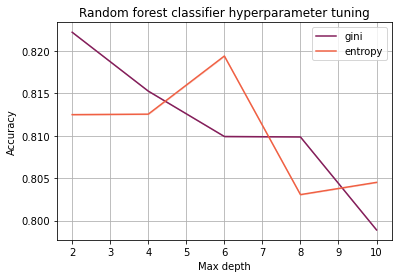

In [431]:
hyperparams = grid_search.cv_results_['params']
mean_test_scores = grid_search.cv_results_['mean_test_score']

dep = [x['max_depth'] for x in hyperparams]
criterion = [x['criterion'] for x in hyperparams]

sns.lineplot(x=dep,y=mean_test_scores,hue=criterion,palette='rocket',ci=False)

plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.title('Random forest classifier hyperparameter tuning')
plt.grid(True)
plt.show()

In [456]:
y_pred = grid_search.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
f_1 = metrics.f1_score(y_test, y_pred)

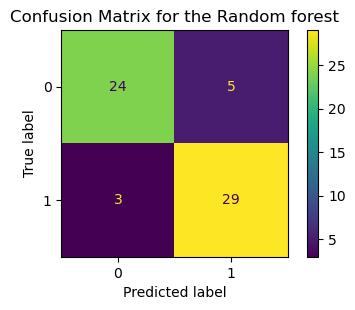

In [458]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,3), dpi=100)
matr = ConfusionMatrixDisplay(cm, display_labels=grid_search.classes_)
ax.set(title='Confusion Matrix for the Random forest')
matr.plot(ax=ax)

In [118]:
metric_class = metric_class.append({'Model':'RandomForestClassifier','Accuracy':accuracy,'F1 score':f_1},ignore_index=True)

In [119]:
metric_class

,Model,Accuracy,F1 score
0,LogisticRegression,0.868852,0.875000
1,DecisionTreeClassifier,0.819672,0.813559
2,RandomForestClassifier,0.852459,0.861538


In [459]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [2, 4, 6, 8, 10],
}

grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

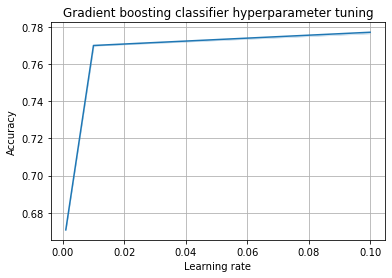

In [460]:
hyperparams = grid_search.cv_results_['params']
mean_test_scores = grid_search.cv_results_['mean_test_score']

dep = [x['learning_rate'] for x in hyperparams]

sns.lineplot(x=dep,y=mean_test_scores,ci=False)

plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.title('Gradient boosting classifier hyperparameter tuning')
plt.grid(True)
plt.show()

In [461]:
y_pred = grid_search.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
f_1 = metrics.f1_score(y_test, y_pred)

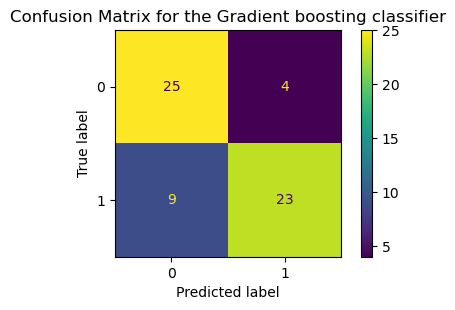

In [462]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,3), dpi=100)
matr = ConfusionMatrixDisplay(cm, display_labels=grid_search.classes_)
ax.set(title='Confusion Matrix for the Gradient boosting classifier')
matr.plot(ax=ax)

In [124]:
metric_class = metric_class.append({'Model':'GradientBoostingClassifier','Accuracy':accuracy,'F1 score':f_1},ignore_index=True)

In [125]:
metric_class

,Model,Accuracy,F1 score
0,LogisticRegression,0.868852,0.875000
1,DecisionTreeClassifier,0.819672,0.813559
2,RandomForestClassifier,0.852459,0.861538
3,GradientBoostingClassifier,0.786885,0.779661


In [126]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}

# Clustering
The data consist of data for customers of a store and the initial task is to cluster them in the best way possible

https://www.kaggle.com/datasets/dev0914sharma/customer-clustering

In [463]:
X = pd.read_csv('segmentation data.csv')
X.drop('ID',axis=1,inplace=True)

<AxesSubplot:>

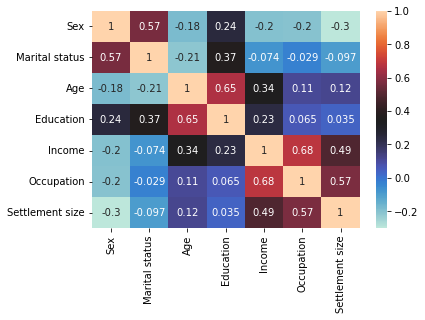

In [464]:
sns.heatmap(X.corr(),annot=True, cmap='icefire')

In [467]:
X.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


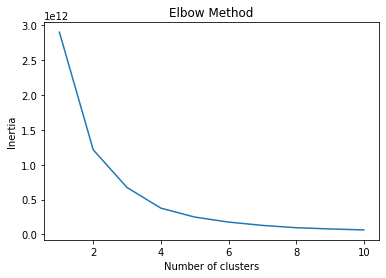

In [469]:
wcss = []
for i in range(1, 11):
    
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [480]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


In [492]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

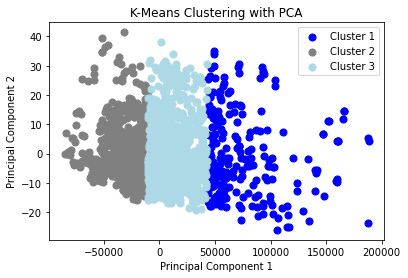

In [493]:
plt.scatter(X_pca[pred_y==0, 0], X_pca[pred_y==0, 1], s=50, c='blue', label='Cluster 1')
plt.scatter(X_pca[pred_y==1, 0], X_pca[pred_y==1, 1], s=50, c='Grey', label='Cluster 2')
plt.scatter(X_pca[pred_y==2, 0], X_pca[pred_y==2, 1], s=50, c='lightblue', label='Cluster 3')
#plt.scatter(X_pca[pred_y==3, 0], X_pca[pred_y==3, 1], s=50, c='red', label='Cluster 3')
plt.legend()
plt.title('K-Means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [494]:
X['Class'] = pred_y

In [495]:
silhouette_avg = silhouette_score(X, pred_y)
print('Silhouette score:', silhouette_avg)

db_score = davies_bouldin_score(X, pred_y)
print('Davies-Bouldin score:', db_score)

Silhouette score: 0.5116316295530345
Davies-Bouldin score: 0.6117146131276483


In [498]:
metrics_ul = pd.DataFrame()
metrics_ul['Model'] = ['K-means']
metrics_ul['DB score'] = [0.61]
metrics_ul['Silhouette score'] = [0.51]
metrics_ul

,Model,DB score,Silhouette score
0,K-means,0.61,0.51


In [290]:

param_grid = {'min_samples': [2, 3, 4, 5, 6,7,8],
              'xi': [0.0001,0.005,0.01, 0.05, 0.1, 0.2, 0.5]}
params = {}
for min_sample in param_grid['min_samples']:
    for xi in param_grid['xi']:
        pred_y = OPTICS(min_samples=min_sample,xi=xi).fit_predict(X_tsne)
        sc = metrics.silhouette_score(X_tsne,pred_y)
        params[sc] = [xi,min_sample]
params

/Users/michaelmiller/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_optics.py:802: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
/Users/michaelmiller/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_optics.py:802: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
/Users/michaelmiller/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_optics.py:802: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
/Users/michaelmiller/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_optics.py:802: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
/Users/michaelmiller/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_optics.py:802: RuntimeWarning: divide by zero encountered in true_divide
  ratio

{0.5457224: [0.005, 2],
 0.54459435: [0.01, 2],
 0.5303607: [0.05, 2],
 0.51044273: [0.1, 2],
 0.46158874: [0.2, 2],
 0.098736234: [0.5, 2],
 0.34846684: [0.0001, 3],
 0.34917334: [0.005, 3],
 0.34439006: [0.01, 3],
 0.3148584: [0.05, 3],
 0.27405775: [0.1, 3],
 0.14491668: [0.2, 3],
 -0.52787316: [0.5, 3],
 0.21602482: [0.0001, 4],
 0.21230906: [0.005, 4],
 0.21039358: [0.01, 4],
 0.15699357: [0.05, 4],
 0.10740889: [0.1, 4],
 -0.09771203: [0.2, 4],
 -0.66470826: [0.5, 4],
 0.17636359: [0.0001, 5],
 0.17350943: [0.005, 5],
 0.16263382: [0.01, 5],
 0.11887073: [0.05, 5],
 0.11265727: [0.1, 5],
 -0.0843387: [0.2, 5],
 -0.3215357: [0.5, 5],
 0.21101342: [0.0001, 6],
 0.20444416: [0.005, 6],
 0.20663278: [0.01, 6],
 0.14617844: [0.05, 6],
 0.10182442: [0.1, 6],
 -0.07499709: [0.2, 6],
 -0.032625373: [0.5, 6],
 0.18513027: [0.0001, 7],
 0.18383862: [0.005, 7],
 0.18106094: [0.01, 7],
 0.18006998: [0.05, 7],
 0.1674619: [0.1, 7],
 0.054656606: [0.2, 7],
 0.33160144: [0.5, 7],
 0.24442306: [

In [489]:
pred_y = OPTICS(min_samples=2,xi=0.005).fit_predict(X)

In [490]:
silhouette_avg = silhouette_score(X, pred_y)
print('Silhouette score:', silhouette_avg)

db_score = davies_bouldin_score(X, pred_y)
print('Davies-Bouldin score:', db_score)

Silhouette score: 0.5212810772389624
Davies-Bouldin score: 7.8895536151167915


In [278]:
tsne = TSNE(n_components=2, random_state=228)
X_tsne = tsne.fit_transform(X)

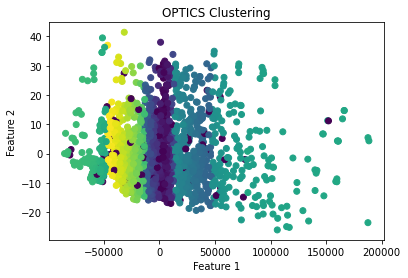

In [468]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pred_y, cmap='viridis')
plt.title('OPTICS Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [500]:
metrics_ul.append({'Model':'OPTICS', 'DB score': 7.889, 'Silhouette score':0.52},ignore_index=True)


,Model,DB score,Silhouette score
0,K-means,0.610,0.51
1,OPTICS,7.889,0.52


In [479]:
metrics_ul

,DB score,Silhouette score
0,7.889554,<function silhouette_score at 0x7fa4e263c4c0>


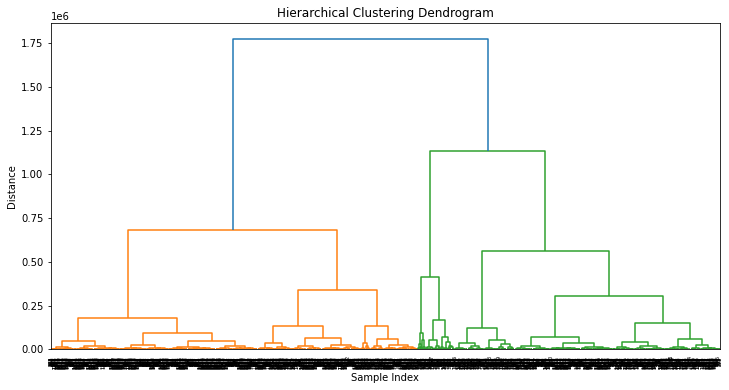

Number of clusters: 1931


In [214]:
Z = linkage(X, 'ward')

# Visualize the dendrogram
plt.figure(figsize=(12, 6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()

max_d = 100  
clusters = fcluster(Z, max_d, criterion='distance')
n_clusters = len(np.unique(clusters))
print('Number of clusters:', n_clusters)

In [222]:
max_d = 1000000
clusters = fcluster(Z, max_d, criterion='distance')
n_clusters = len(np.unique(clusters))
print('Number of clusters:', n_clusters)

Number of clusters: 3
